## Purpose: simple map example

Artificial data.

Demonstration: 
    1. Data in the form of a map
    2. Parameter fit
    3. Results in the form of a map

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from BayesicFitting import GaussModel
from BayesicFitting import PolySurfaceModel
from BayesicFitting import Kernel2dModel
from BayesicFitting import Gauss
from BayesicFitting import AmoebaFitter
from BayesicFitting import LevenbergMarquardtFitter
from BayesicFitting import ImageAssistant
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools
import matplotlib.pyplot as plt

Define some constants to make a gaussian source on a constant background.

In [2]:
# define some constants
N = 71
b0 = 3.5            # amplitude of source
b1 = 30             # position
b2 = 45             # position
b3 = 13             # size of source
b4 = 0.3            # background

sig = 0.2

Make a map as a direct product of 2 one dimensional Gaussians. Add the background and noise.

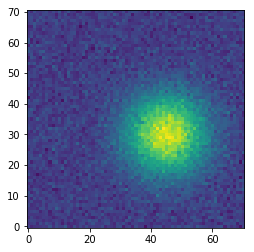

In [3]:
x = numpy.arange( N, dtype=float )
x1 = ( x - b1 ) / b3
y1 = numpy.exp( - x1 * x1 )
x2 = ( x - b2 ) / b3
y2 = numpy.exp( - x2 * x2 )

y = b0 * numpy.outer( y1, y2 ) + b4
numpy.random.seed( 130105 )
y += sig * numpy.random.randn( N, N )
plt.imshow( y, origin="lower" )
plt.show()

Define the model as a 2-d KernelModel using a circular Gaussian kernel.
Add a constant 2d polynomial.

In [4]:
mdl = Kernel2dModel( kernel=Gauss(), shape='circular' )
mdl += PolySurfaceModel( 0 )
print( mdl )
lo = [0, 0, 0, 0.01, 0 ]
hi = [10, 70, 70, 70, 10 ]
#mdl.setLimits( lo, hi )
par = [5.0,30.0,30.0,30.0,5.0]
mdl.parameters = par


2-d-Circular-Gauss: exp( -0.5 * x^2 ) +
PolySurface: f( x,y:p ) = p_4


Define the fitter: AmoebaFitter.
The map, y, defines both the xdata and the ydata. By setting map=True the fitter transforms the map into a (N*N,2) array of pixel positions, one for every pixel in the map, which is used as xdata.
The fitter attribute 'yfit' returns the result as a map, while the result of the model is just a 1d array.

y       (71, 71)
xdata   (5041, 2)
yfit    (71, 71)
mdlfit  (5041,)


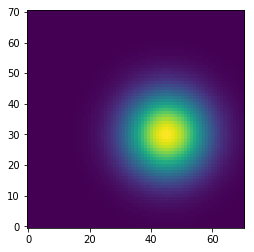

In [5]:
fitter = AmoebaFitter( y, mdl, map=True )
print( "y      ", y.shape )
print( "xdata  ", fitter.xdata.shape )
 
# find the parameters
param = fitter.fit( y, temp=10, maxiter=100000, size=5 )

print( "yfit   ", fitter.yfit.shape )
print( "mdlfit ", mdl( fitter.xdata ).shape )

plt.imshow( fitter.yfit, origin="lower" )
plt.show()  

In [6]:
print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

Parameters : [    3.501   30.025   44.957    9.220    0.300]
StDevs     : [    0.154    0.404    0.404    0.331    0.033]
Chisq      :   207.455
Scale      :     1.773
Evidence   :   -87.920
Covar matrix :
[[    0.024    0.000   -0.000   -0.031   -0.000]
 [    0.000    0.163   -0.000    0.000   -0.000]
 [   -0.000   -0.000    0.163   -0.000    0.000]
 [   -0.031    0.000   -0.000    0.109   -0.005]
 [   -0.000   -0.000    0.000   -0.005    0.001]]


See also randommap.ipynb